## Ordinal non-additive MNIST (ONA-MNIST)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gzip
import pickle

In [3]:
dat = pickle.load(gzip.open("../../../data/mnist.pkl.gz"))

In [4]:
train_data, valid_data, test_data = dat

In [9]:
X_train, y_train = train_data
X_train = X_train.reshape((X_train.shape[0], 1, 28, 28))
X_valid, y_valid = valid_data
X_valid = X_valid.reshape((X_valid.shape[0], 1, 28, 28))
X_test, y_test = test_data
X_test = X_test.reshape((X_test.shape[0], 1, 28, 28))

In [7]:
X_train.dtype

dtype('float32')

In [29]:
def create_digit(d1, d2):
    sz = 48
    blank = np.zeros((sz,sz))
    for dg in [d1, d2]:
        rand_x = np.random.randint(0, sz-28)
        rand_y = np.random.randint(0, sz-28)
        blank[rand_y:rand_y+28,rand_x:rand_x+28] += dg
        np.clip(blank, 0, 1)
    return blank

In [52]:
y_train

array([5, 0, 4, ..., 8, 4, 8])

2 + 1


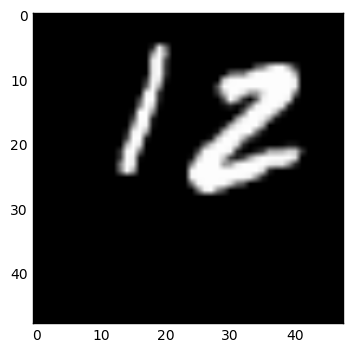

In [101]:
idx1 = np.random.randint(0, X_train.shape[0])
idx2 = np.random.randint(0, X_train.shape[0])
print "%i + %i" % (y_train[idx1], y_train[idx2])
plt.imshow(create_digit(X_train[idx1][0], X_train[idx2][0]),cmap="gray")

In [107]:
def create_dataset():
    np.random.seed(0)
    # create a new dataset which is the same
    # size as the original mnist dataset
    results = []
    for X_frame, y_frame in [(X_train, y_train),(X_valid,y_valid),(X_test,y_valid)]:
        X_frame_new = np.zeros((X_frame.shape[0], 1, 48, 48))
        y_frame_new = np.zeros((X_frame.shape[0],))
        for e in range(X_frame.shape[0]):
            idx1 = np.random.randint(0, X_frame.shape[0])
            idx2 = np.random.randint(0, X_frame.shape[0])
            img = create_digit(X_frame[idx1][0], X_frame[idx2][0])
            X_frame_new[e][0] = img
            y_frame_new[e] = y_frame[idx1] + y_frame[idx2]
        results.append(X_frame_new)
        results.append(y_frame_new)
    return results

In [108]:
new_dataset = create_dataset()

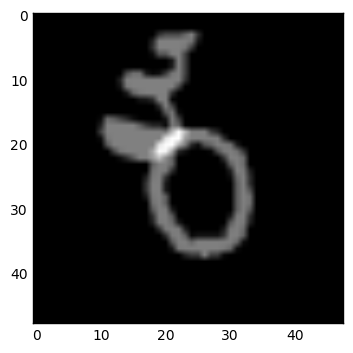

In [123]:
plt.imshow(new_dataset[0][-2][0],cmap="gray")

In [127]:
new_dataset[1]

18.0

In [128]:
from collections import Counter

In [131]:
Counter(new_dataset[5])

Counter({0.0: 87,
         1.0: 227,
         2.0: 301,
         3.0: 413,
         4.0: 501,
         5.0: 581,
         6.0: 712,
         7.0: 799,
         8.0: 890,
         9.0: 1002,
         10.0: 914,
         11.0: 799,
         12.0: 700,
         13.0: 563,
         14.0: 495,
         15.0: 396,
         16.0: 312,
         17.0: 200,
         18.0: 108})

In [143]:
import h5py
f = h5py.File("/tmp/mnist.ord.na.h5", "w")
f.create_dataset('xt', shape=new_dataset[0].shape, dtype=new_dataset[0].dtype)
f['xt'][:] = new_dataset[0]
f.create_dataset('yt', shape=new_dataset[1].shape, dtype=new_dataset[1].dtype)
f['yt'][:] = new_dataset[1]
f.create_dataset('xv', shape=new_dataset[2].shape, dtype=new_dataset[2].dtype)
f['xv'][:] = new_dataset[2]
f.create_dataset('yv', shape=new_dataset[3].shape, dtype=new_dataset[3].dtype)
f['yv'][:] = new_dataset[3]
f.create_dataset('xtest', shape=new_dataset[4].shape, dtype=new_dataset[4].dtype)
f['xtest'][:] = new_dataset[4]
f.create_dataset('ytest', shape=new_dataset[5].shape, dtype=new_dataset[5].dtype)
f['ytest'][:] = new_dataset[5]
f.close()

In [145]:
%%bash
rm /tmp/mnist.ord.na.h5